# Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve,auc
from sklearn.calibration import calibration_curve
import import_ipynb
from DataPreProcessing import new_df,X,y,X_train, X_test, y_train,y_test,sc

 # Building and Training a Neural Network Model

In [2]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(4,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,y_train, epochs=5)

c:\Users\s2300\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 226s 2ms/step - accuracy: 0.9987 - loss: 0.0113
Epoch 2/5
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 241s 2ms/step - accuracy: 0.9992 - loss: 0.0041
Epoch 3/5
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 244s 2ms/step - accuracy: 0.9992 - loss: 0.0037
Epoch 4/5
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 245s 2ms/step - accuracy: 0.9992 - loss: 0.0035
Epoch 5/5
149124/149124 ━━━━━━━━━━━━━━━━━━━━ 243s 2ms/step - accuracy: 0.9992 - loss: 0.0034


## To Check if the model is overfitting or underfitting

In [3]:
 
y_train_pred_ann = model.predict(X_train)
y_val_pred_ann = model.predict(X_test)

# Convert predictions to binary format (0 or 1)
y_train_pred_ann_binary = np.where(y_train_pred_ann > 0.5, 1, 0)
y_test_pred_ann_binary = np.where(y_val_pred_ann > 0.5, 1, 0)

# Calculate accuracy scores
train_accuracy_ann = accuracy_score(y_train, y_train_pred_ann_binary)
val_accuracy_ann = accuracy_score(y_test, y_test_pred_ann_binary)

149124/149124 ━━━━━━━━━━━━━━━━━━━━ 211s 1ms/step
49708/49708 ━━━━━━━━━━━━━━━━━━━━ 72s 1ms/step


In [4]:
train_accuracy = round(train_accuracy_ann)
val_accuracy = round(val_accuracy_ann)
print("Training Accuracy:", train_accuracy )
print("Validation Accuracy:",  val_accuracy)


Training Accuracy: 1
Validation Accuracy: 1


In [5]:
if train_accuracy > val_accuracy:
    print("The model may be overfitting.")
elif train_accuracy < val_accuracy:
    print("The model may be underfitting.")
else:
    print("The model's performance on training and validation sets are similar")


The model's performance on training and validation sets are similar


# Predicting a new result

In [6]:
model.predict([[1,9839.64, 170136.0,160296.36]])

ValueError: Unrecognized data type: x=[[1, 9839.64, 170136.0, 160296.36]] (of type <class 'list'>)

In [7]:
model.predict([[4,181.00, 181.00,0.00]])

ValueError: Unrecognized data type: x=[[4, 181.0, 181.0, 0.0]] (of type <class 'list'>)

# Prediciting the test set results

In [8]:
y_pred = model.predict(X_test)

49708/49708 ━━━━━━━━━━━━━━━━━━━━ 30s 612us/step


In [9]:
threshold = 0.5   #A threshold of 0.5 is often chosen when there is no specific preference for precision or recall. 
                  #It provides a balanced trade-off between the two metrics.
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

In [10]:
print(np.concatenate((y_pred_binary.reshape(len(y_pred_binary), 1),y_test.reshape(len(y_test), 1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Accuracy

In [11]:
accuracy = accuracy_score(y_test,y_pred_binary)
round(accuracy*100,2)

99.92

# Classification Report

In [12]:
print(classification_report(y_test, y_pred_binary))

'''
0- No Fraud
1- Fraud
'''

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588628
           1       0.93      0.44      0.60      2027

    accuracy                           1.00   1590655
   macro avg       0.96      0.72      0.80   1590655
weighted avg       1.00      1.00      1.00   1590655



'\n0- No Fraud\n1- Fraud\n'

# ROC Curve

49708/49708 ━━━━━━━━━━━━━━━━━━━━ 28s 572us/step


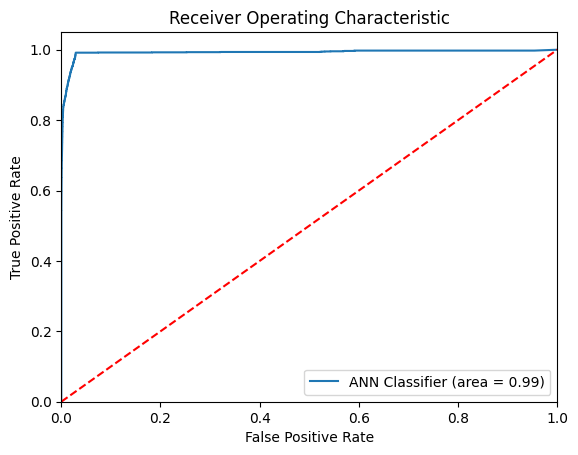

In [13]:
 
# Make predictions on the test set
y_pred_proba = model.predict(X_test)

# Calculate ROC AUC score
ann_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ANN Classifier (area = %0.2f)' % ann_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()


# Precision-Recall Curve

149124/149124 ━━━━━━━━━━━━━━━━━━━━ 87s 581us/step


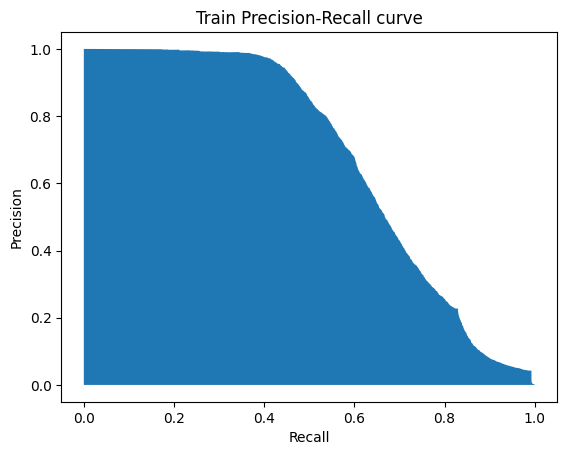

AUC-PRC: 0.6769185247807601


In [14]:
y_prob_train_ann = model.predict(X_train)

# Calculate precision-recall curve
precision_ann, recall_ann, _ = precision_recall_curve(y_train, y_prob_train_ann)

# Plot precision-recall curve
plt.fill_between(recall_ann, precision_ann)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")
plt.show()
from sklearn.metrics import precision_recall_curve, auc
auc_prc = auc(recall_ann, precision_ann)
print("AUC-PRC:", auc_prc)

# Confusion Matrix

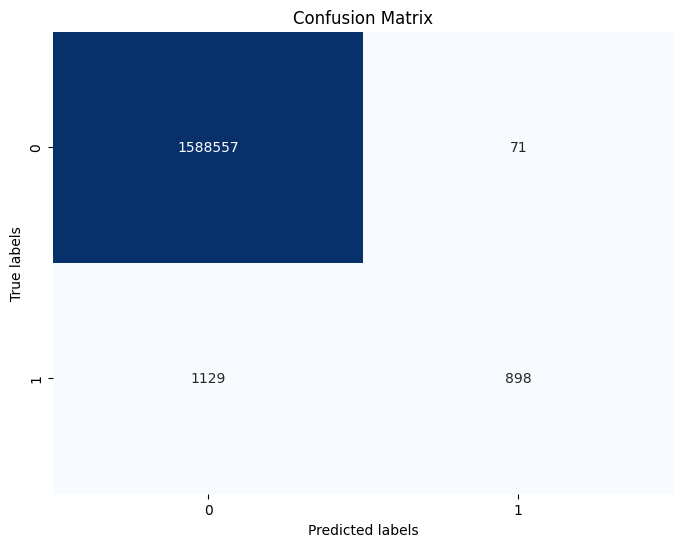

In [15]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Calibration Curve

149124/149124 ━━━━━━━━━━━━━━━━━━━━ 87s 581us/step


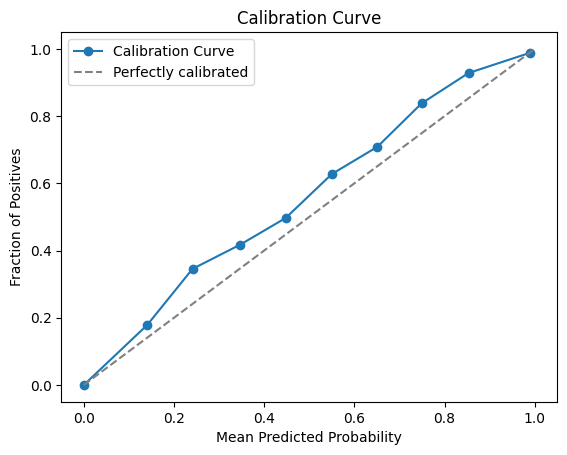

In [16]:
# Get predicted probabilities for the training set
y_prob_train_ann = model.predict(X_train)

# Calculate calibration curve
prob_true, prob_pred = calibration_curve(y_train, y_prob_train_ann, n_bins=10)

# Plot calibration curve
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()
